In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

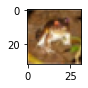

In [9]:
plot_sample(0)

In [10]:
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]


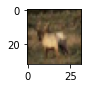

In [11]:
plot_sample(3)

In [12]:
y_train[3]

array([4], dtype=uint8)

In [13]:
classes[y_train[3][0]]

'deer'

In [14]:
x_train_scaled = X_train/255              # normalization can use minmax scaler in sklearn library  
x_test_scaled = X_test/255

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# x_train_scaled1 = x_train.copy()
# x_train_scaled1 = x_train_scaled1.reshape(-1, 1)
# x_train_scaled1 = scaler.fit_transform(x_train_scaled1)
# x_train_scaled1 = x_train_scaled1.reshape(x_train.shape)
# x_train_scaled1.shape

# x_test_scaled1 = x_test.copy()
# x_test_scaled1 = x_test_scaled1.reshape(-1, 1)
# x_test_scaled1 = scaler.fit_transform(x_test_scaled1)
# x_test_scaled1 = x_test_scaled1.reshape(x_test.shape)
# x_test_scaled1.shape


In [15]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [16]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)


In [17]:
y_train[0:5]         # if this is passed in the NN use sparse_categorical_crossentropy

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train_categorical[0:5]          # if this one hot encoded is passed then use categorical_crossentropy

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)


Epoch 1/50
1563/1563 [==============================] - 22s 12ms/step - loss: 1.8111 - accuracy: 0.3548
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6231 - accuracy: 0.4266
Epoch 3/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5382 - accuracy: 0.4586
Epoch 4/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4810 - accuracy: 0.4772
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4313 - accuracy: 0.4953
Epoch 6/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3892 - accuracy: 0.5131
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3494 - accuracy: 0.5257
Epoch 8/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3140 - accuracy: 0.5377
Epoch 9/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2830 - accuracy: 0.5496
Epoch 10/50
1563/1563 [==============================] - 22s 14m

In [22]:
model.predict(x_test_scaled)[0]

array([8.5894638e-01, 3.6191437e-01, 2.5241995e-01, 9.9780923e-01,
       8.7393796e-01, 6.2798494e-01, 9.4965789e-03, 5.7991978e-04,
       9.6503943e-01, 1.3412412e-01], dtype=float32)

In [23]:
classes[y_test[0][0]]

'cat'

In [27]:
np.argmax(model.predict(x_test_scaled)[1])

8

# predictions

In [34]:
classes[np.argmax(model.predict(x_test_scaled)[1])]       # prediction label


'ship'

In [35]:
classes[y_test[1][0]]               # truth or actual

'ship'

In [41]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 1.6055 - accuracy: 0.5623


[1.6054760217666626, 0.5623000264167786]

# Measure training time on a CPU

In [43]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [47]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)


1563/1563 [==============================] - 110s 69ms/step - loss: 1.8121 - accuracy: 0.3535
2min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8130 - accuracy: 0.3545
33.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [50]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 113s 71ms/step - loss: 1.8107 - accuracy: 0.3559
Epoch 2/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6238 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5413 - accuracy: 0.4554
Epoch 4/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4815 - accuracy: 0.4777
Epoch 5/10
1563/1563 [==============================] - 121s 78ms/step - loss: 1.4332 - accuracy: 0.4956
Epoch 6/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.3895 - accuracy: 0.5108
Epoch 7/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.3506 - accuracy: 0.5226
Epoch 8/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.3122 - accuracy: 0.5397
Epoch 9/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.2835 - accuracy: 0.5502
Epoch 10/10
1563/1563 [==============================] 

In [51]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 1.8164 - accuracy: 0.3529
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6261 - accuracy: 0.4278
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5429 - accuracy: 0.4561
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4840 - accuracy: 0.4766
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4341 - accuracy: 0.4944
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3892 - accuracy: 0.5129
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3496 - accuracy: 0.5266
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3148 - accuracy: 0.5373
Epoch 9/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.2834 - accuracy: 0.5489
Epoch 10/10
1563/1563 [==============================] - 22s 14m


| Epoch | CPU | GPU |
| --- | --- | --- |
| 1 | 110s | 20s |
| 10 | 19mins 21s | 4mins 